In [1]:
import sys
sys.path.append('..')
from dnn import DNN
from dbn import DBN
from load_data import *

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm

# Load data

In [2]:
binary_alpha = lire_alpha_digits(['A', 'E', 'X', '4'])

In [3]:
X_train, y_train, X_test, y_test = load_mnist()

# Hyperparameters

In [4]:
epochs = 3000
batch_size = 512
learning_rate = 1e-3
patience = 10

nb_layers = 3
neurons = [256, 512, 256]

# Alpha Digits

In [5]:
dbn_alpha = DBN(X=binary_alpha, L=nb_layers, qs=neurons, use_adam=True)

In [6]:
dbn_alpha.train_DBN(epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [00:52<00:00, 17.67s/rbm, total_loss=0.0677]


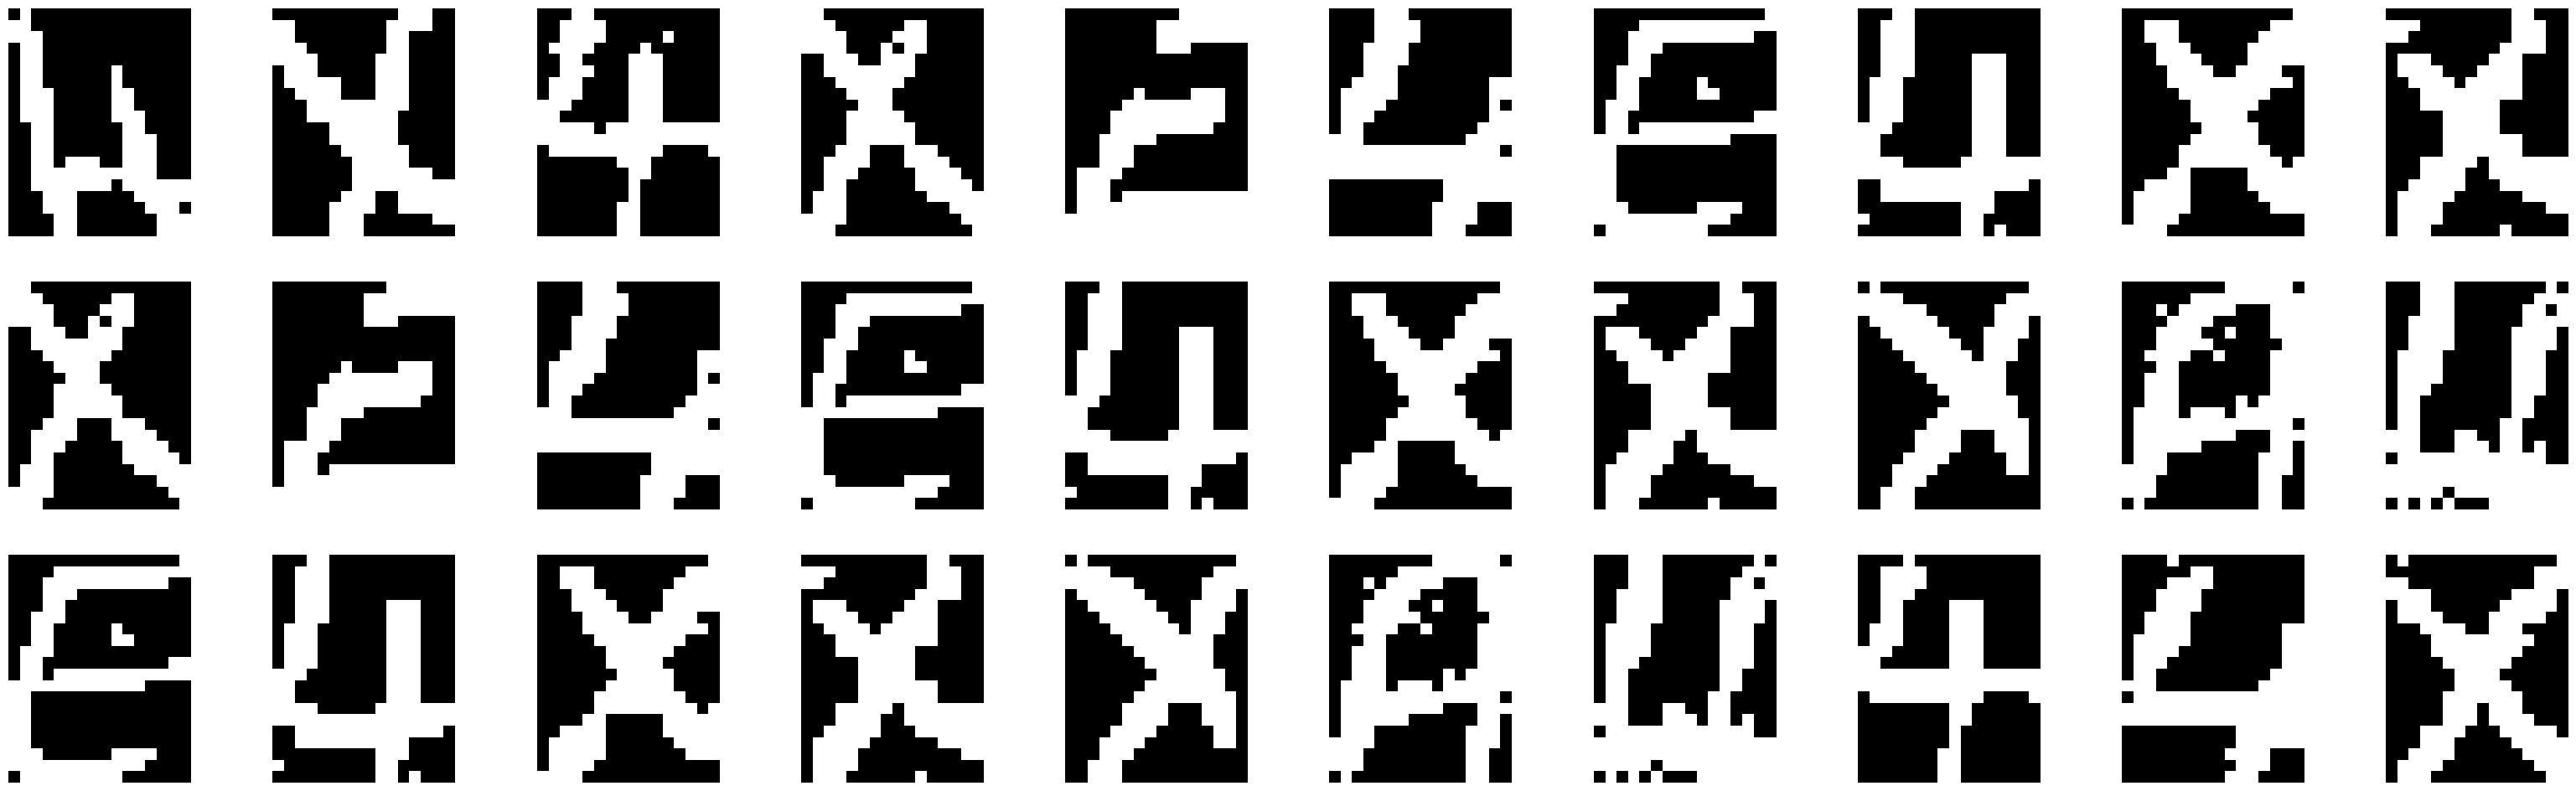

In [9]:
alpha_gen = dbn_alpha.generer_image_DBN(num_samples=30, gibbs_steps=1000, image_size=(20, 16))

# MNIST

### No pretrain - SGD

In [14]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=False)

Epoch 0:: loss: 1.9378, val_loss: 1.0539 ; accuracy: 35.28%, val_accuracy: 63.8%
##### Patience triggered at epoch 77! #####
Epoch 77:: loss: 0.0191, val_loss: 0.0892 ; accuracy: 99.66%, val_accuracy: 97.29%


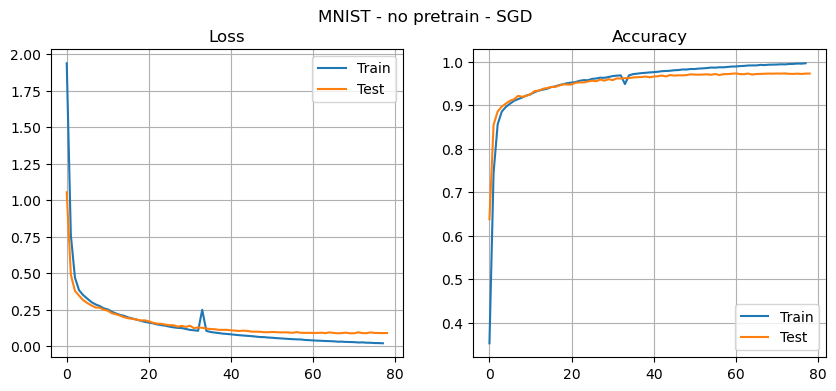

In [15]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, 
    suptitle='MNIST - no pretrain - SGD')

### No pretrain - Adam

In [16]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=True)

Epoch 0:: loss: 1.2468, val_loss: 0.3788 ; accuracy: 66.03%, val_accuracy: 89.29%
##### Patience triggered at epoch 28! #####
Epoch 28:: loss: 0.0035, val_loss: 0.0982 ; accuracy: 99.98%, val_accuracy: 97.49%


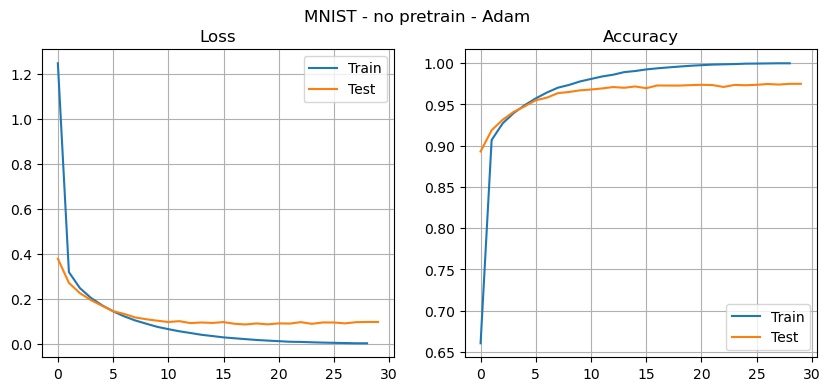

In [17]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, 
    suptitle='MNIST - no pretrain - Adam')

### Pretrain - SGD

In [10]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=False)
dnn.pretrain_DNN(epochs=100, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [23:38<00:00, 472.74s/rbm, total_loss=0.138]


Epoch 0:: loss: 0.5788, val_loss: 0.3082 ; accuracy: 86.42%, val_accuracy: 92.38%
##### Patience triggered at epoch 155! #####
Epoch 155:: loss: 0.0203, val_loss: 0.0714 ; accuracy: 99.63%, val_accuracy: 97.91%


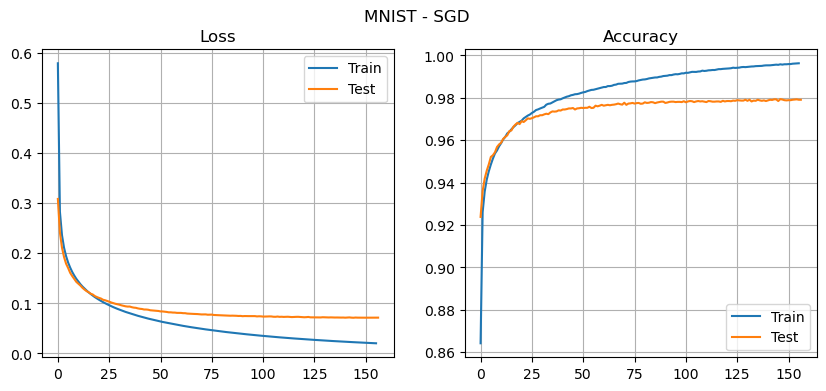

In [11]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, 
    suptitle='MNIST - SGD')

### Adam

In [12]:
dnn = DNN(X_train, y_train, num_classes=10, num_hidden_layers=nb_layers, neurons=neurons,
                X_val=X_test, y_val=y_test, use_adam=True)
dnn.pretrain_DNN(epochs=100, learning_rate=learning_rate, batch_size=batch_size)

RBM 2: 100%|██████████| 3/3 [24:38<00:00, 492.92s/rbm, total_loss=0.172]


Epoch 0:: loss: 0.6497, val_loss: 0.2778 ; accuracy: 82.5%, val_accuracy: 92.61%
##### Patience triggered at epoch 85! #####
Epoch 85:: loss: 0.0032, val_loss: 0.0539 ; accuracy: 100.0%, val_accuracy: 98.43%


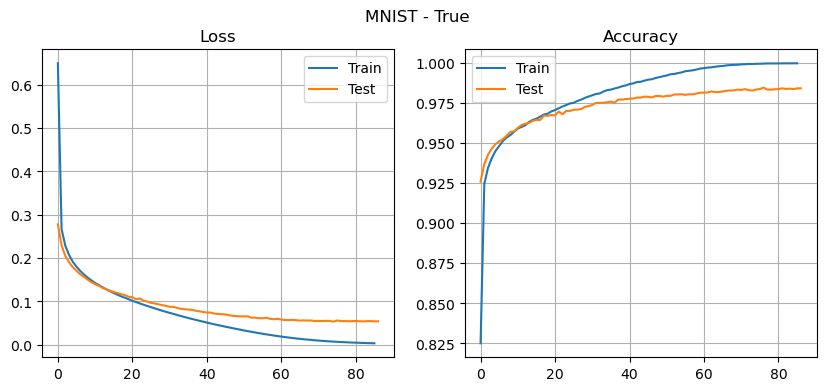

In [13]:
losses, accuracies, val_losses, val_accuracies = dnn.retropropagation(
    epochs=epochs, learning_rate=learning_rate, batch_size=batch_size, plot_=True, patience=patience, 
    suptitle='MNIST - True')